In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

### Demographic Filtering
Before getting started with this
* we need a metric to score or rate movie
* calculate the score for every movie
* sort the scores and recommend the best rated movie to the users

We can use the average ratings of the movie as the score but using this won't be fair enough since a mvie with 8.9 average rating and nly 3 votes cannot be considered vetter than the movie with 7.8 as average rating but 40 vites. So, I'll be using IMDB weighted rating (wr) which is given as

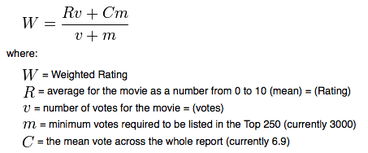

In [4]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [5]:
C = df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10. The next step is to determine an appropiate value for m the minimum vtes required to be listed in the chart. We willl use 90th percentile as our cutff. in other words, for a movie to feature in the charts, it must have more vtes than at least 90% of the movies in the list.

In [6]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

In [7]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de..."
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",...,99.0,"[{""iso_63

We see that there are 481 movies which qualify to be in the list. Now we need to calculate our metric for each qualified movie.

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R + (m/(m+v)*C))

In [9]:
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1)

In [10]:
q_movies = q_movies.sort_values('score',ascending=False)

In [11]:
q_movies[['title','vote_count','vote_average','score']].head()

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

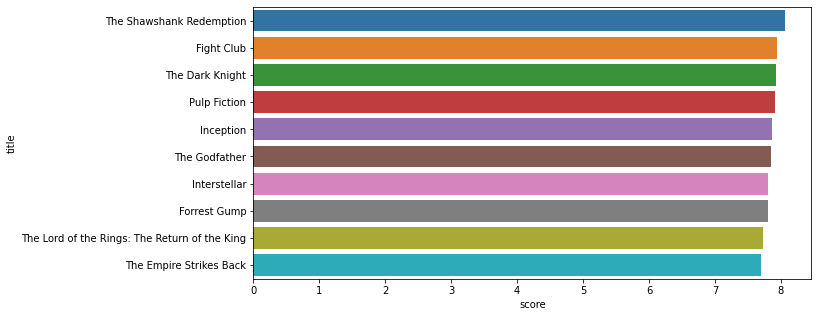

In [13]:
plt.figure(figsize=(10,5))

sns.barplot(data=q_movies.head(10), y='title',x='score')

plt.show()

We have made our fist(though very basic) recommender. Under the Trending Now tab of these system we find mveis that are very popular and they can just be obtained by srting the dataset by the poularatiy column

In [14]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

Now Somethig to keep in mind is that these demographic recommeder provide a general chart of recommeded movies to all the users. Thyey are not sensitive to the interest and tastes of a particular user. This is when we move on to a more refined syste - Content Based Filtering

### Content Based Filtering
In this recommeder system the content of the movie (overview, cast, crew, keyword, tagline, etc) is used to find its similarity with others movie. The the movies taht are most likely to be similar are recommended

In [15]:
df2['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequence (TF-IDF) vectors for each overview.

Now If you are wondering what is term frequency, it is the relative frequency of a word in a document and is given as (term instance/total intances). Inverse Document Frequency is the realtive count of ducuments containing the terms is given as log(number of documnets/documnets with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview voculabulary (all the words that appear in t least one documnet_ and each row represents a movie, as before. This is done to reduce the impotance of that occur frequntly in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfidfVectorizer class that produces the TF-IDF matrix in a couple of lines. 
That's great, isn't it?

In [16]:
#import TFidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


In [17]:
df2['overview'] = df2['overview'].fillna('')

In [18]:
tfidt_matrix = tfidf.fit_transform(df2['overview'])

In [19]:
tfidt_matrix.shape

(4803, 20978)

We see that over 20K different words we used to describe in the 4800 movies in our dataset
Wuth this matrix in hand, we can nw cumpute a similarity score. There are several candidates for this : such as the eucladian, the Pearson, and hte csine similarity scores. THere is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two moviees. We use the cosine Similarity Score since it is independent of magnitude and is realatively easy and fast to calculate. 

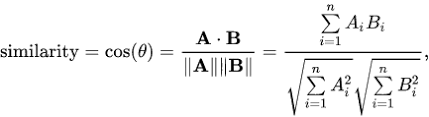

Since we have used the TF-IDF vectorizer, calculating the dot product will directly gie us the cosine similarity score. Therefore, we will use sklearn's linear_kernell() instead of cosine_similarities() since it is faster

In [20]:
#Import Linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidt_matrix, tfidt_matrix)


We are going to difine a function that takes in a movie title as an input and outputs a list of the 10 mst similar movies. Firstly for this, we need a reverse mapping of mvie title and DataFrame indices, In ther words, we need a mechanism to indetify the index of a movie in our metadata DataFrame, give its title

In [21]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [22]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

we are now in a good position to define our recomendation function. These are the following steps we'll follow :
* Get the index of the movie given its title
* Get thie list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements

In [23]:
def get_recommendations(title, cosine_sim=cosine_sim):
    #get the index of the movie that matches the title
    idx = indices[title]
    
    #get the pairwise similarity score of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similaryti scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the tp 10 most similar movies
    
    return df2['title'].iloc[movie_indices]

In [24]:
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object

In [25]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recomendations is no that great.

### Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata : the 3 top actors, the director, related genres and the movie plot keywords.

Form the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, out data is present in the form of "stringfied" lists. we need to convert it into a safe and usable sturcture

In [26]:
# Parse the stringfied features into their corresponding python objects

from ast import literal_eval

features = ['cast','crew','keywords','genres']

for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [27]:
df2[['cast','crew','keywords','genres']]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [28]:
df2[feature]

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, Length: 4803, dtype: object

Next, we will write function that will help us to extract that the required information from each feature.

In [29]:
#Get the director name form the crew feature. If director is not listed, retun Nan
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [30]:
# Return the list top 3 elements or entire list; whicever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. if no, return entire list.
        if len(names) >3:
            names = names[:3]
        return names
    #Return empy list in case of missing
    return[]

In [31]:
# Define new director, cast, genres and keywords features that are in a sutable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [32]:
df2[['title','cast','director','keywords','genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count Johny of "Johnny Depp" and "Johnny Galecki" as the same.

In [33]:
#Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        #Check if director exist. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [34]:
#Apply clean_data function to your features.
features = ['cast','keywords','director','genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

We are now in a position to create our "metadata soup" which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director, and keywords).

In [35]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [36]:
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

The next steps are the same as what we didi with our plot descroption based recommender. One important differece is we use the CountVectorizer() instead of TF-DF. This is because we do not want to down-weight the presence of actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [37]:
#import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [38]:
#Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [39]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [40]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

### Collabrative Filtering
Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certaion movie. That is, it is not capable of capturing tastes and providing recommendations acress genres.
Also, the engine that we built is not really personal in that it doesn't capure the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie willl receive the same recommendations for tahe movie, regardless of who she/he is.

Therefore, in this section we will use a technique called Collaborative Filtering to make recommendations to Movie Wathcers.

In [41]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

In [42]:
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [43]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

In [44]:
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7fb87902e040>

In [45]:
svd = SVD()
cross_validate(svd,data, measures=['MAE','RMSE'])

{'test_mae': array([0.69572505, 0.68647475, 0.68909827, 0.6883471 , 0.69552109]),
 'test_rmse': array([0.90500792, 0.88972728, 0.89487789, 0.89805838, 0.90097203]),
 'fit_time': (4.525680303573608,
  4.538406133651733,
  4.58797287940979,
  4.5775840282440186,
  5.242866039276123),
 'test_time': (0.21780705451965332,
  0.11489009857177734,
  0.12305307388305664,
  0.11194801330566406,
  0.23180794715881348)}

In [46]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [47]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [48]:
svd.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7713748508923617, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.8784. One starting feature of this recommender system is taht it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID an tries to predict ratings based on how the users have preditcted the movie

In [49]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [50]:
id_map = pd.read_csv('links_small.csv')[['movieId','tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId','id']
id_map = id_map.merge(df2[['title','id']],on='id').set_index('title')

In [51]:
indices_map = id_map.set_index('id')

In [52]:
id_map

,movieId,id
title,,
Toy Story,1,862.0
GoldenEye,10,710.0
The American President,11,9087.0
Nixon,14,10858.0
Cutthroat Island,15,1408.0
...,...,...
The Maid's Room,160440,278348.0
The Legend of Tarzan,160563,258489.0
The Purge: Election Year,160565,316727.0


In [53]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [68]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)